In [1]:
# @Author: Kai Bernardini
# CS237: Spring 2018, extra resources 

import numpy as np
from numpy.random import randint

In [2]:
n = 10
t = randint(1,7,(n)) 
t

array([5, 4, 6, 5, 1, 4, 2, 6, 2, 6])

In [3]:
def trial(n=10):
    assert n %2 ==0
    t = randint(1,7,(n))
    # checks if it is even or not
    outcomes = t % 2 ==0
    # check to see if the number of evens = number of oods 
    return sum(outcomes) == n/2

In [4]:
c = 0
N = 10000
for i in range(N):
    c += trial()
c

2522

In [5]:
c/N

0.2522

In [6]:
t = randint(1,7,(10))
outcomes = t % 2 ==0
outcomes

array([ True,  True, False,  True,  True,  True, False, False,  True,
       False])

In [7]:
# simulates 1 trial of at least 2 consecutive Even numnbers 

def trial(n=10):
    # counting the number of consecutive evens 
    flag = 0 
    for i in outcomes:
        if i == True:
            # we saw even 
            flag +=1
        else:
            # we saw an ood 
            flag =0
        if flag >= 3:
            return True 
    return False 


## General Idea
This notebook will briefly introduce Simulation.

We will begin this discussion with a simple example. Suppose we flip two  **fair coins** and are interested in the number of heads we observe. Let $H$ be a heads and $T$ be a tails. Lets say we want to know the probability that exactly one of the coins comes up heads.  Then the sample space for flipping two fair coins is  $$\Omega = \{(H,H), (H,T), (T,H), (T,T) \}$$ Then this event is $A\subset \Omega$, $A=\{(T,H),(H,T)\}$ and we can compute $$Pr(A) = \frac{|A|}{|\Omega|} = \frac{2}{4}= \frac{1}{2}$$ 

## Example 1: Counting Heads
For simple processes like the one described above, it is trivial to compute the probability of events, since we can easily write it down explicitly. However, this strategy would become significantly more difficult if we flipped 10 fair coins, or 100, or 1000. If we tried to enumerate all possible strings composed of $H,T$, we would very quickly run out of space in the observable universe. So, lets try simulating the solution for the example above, and see if we can generalize it to an arbitrary finite number of coins. 


In general, there are 2 things we need in order to carry out a  Simulation with the goal of estimating $Pr(A)$:
- 1) A way to simulate drawing elements from $\Omega$ randomly (an easily repeatable random process). We will in general call this function the _trial function_ as it simulates 1 trial of the random experiment. 
- 2) A way to check if a randomly generated element is in $A$ (an indicator function). 

The basic idea is to perform $N$ trials  of random draws from $\Omega$, and compute the proportion of times $A$ occurs to the total number of trials. I.E., we will estimate $$Pr(A) \approx \frac{\#\text{times A occurs} }{\#\text{of trials}}$$

To make this idea more concrete, lets introduce some notation.  Lets give a name to each of the trials: let $T_1,\ldots , T_N$ be the outcomes of $N$ trials, where $T_i$ is independent of $T_j$ for $i\neq j$.   In order to count the number of outcomes that have exactly 1 head, we define a function called _the indicator function_. We will write this in general as $$\mathbb{1}_{A}(x) = \begin{cases}1 & \text{ if } x \in A \\ 0 & \text{ if } x \not\in A  \end{cases}$$

In English, the indicator function for this problem will take an outcome $T_i$ and return 1 if for trial $i$, we observed exactly 1 head and 0 otherwise. In this way, we can approximate $Pr(A)$ with $$Pr(A) \approx \frac{1}{N} \sum_{i=1}^N \mathbb{1}_{A}(T_i)$$
Remember, all this expression means in English is "the proportion of outcomes with exactly 1 heads to total trials."


# Real World Concerns


Lets go back to the requirements for simulation. 


- The first requirement tends to be difficult for some physical applications.
    - For example, if you wanted to estimate the probability of $A$, it would be very tedious to actually flip a two coins thousands of times. Thus, we relax this requirement to allow for sources of pseudo-randomness (i.e., we can use numpy's `randint` function). 
    
- Since we know that $Pr(A) = \frac{|A|}{|\Omega|}$, we simply make use of the fact that the probability of $A$ in the finite case is exactly the percentage of $\Omega$ that $A$ makes up. We now introduce some python code to simulate the event described above.


In [8]:
# The trial function 
def coin_trial():
    """Simulates the fliping a fair coin. We will use the number 0 to denote Tails and 1 to denote Heads.
    0  <--> Tails
    1  <--> Heads 
    This function simulates the random process of flipping two fair coins
    """
    return randint(0,2,(2))
    
# The indicator function  
def indicator_function_heads(coin_outcome):
    # Check if there is exactly 1  head in the string
    # This amounts to adding across the coin outcomes
    # If there were no heads, we would see (0,0) and the sum would be 0
    # If there were 2 heads, we would observer (1,1) and the sum would be 2
    # If we get exactly 1 heads, that would be (0,1) or (1,0) and would some to 1
    return sum(coin_outcome) == 1

# Average over multiple trials 
def estimate_Pr_A(N):
    # Count the number of times we observe a Heads
    c = 0
    for i in range(N):
        # flip 2 fair coins
        coin_i = coin_trial()
        # test if there is exactly 1 coin in the outcomes
        c += indicator_function_heads(coin_i)
    # return proportion of trials that had exactly 1 heads to those that don't 
    return c / N

# Should be close to 1/2
estimate_Pr_A(10000)

0.4945

In [9]:
# Simulate using Numpy
# A compact and efficient way
def numpy_simulate(N):
    # simulate flipping a coin N times 
    # This builds a numpy array of random pairs of 0/1s of size N
    coin_outcomes  = randint(0,2,(2, N))
    # Since tails is 0 and heads is 1, we can just add up the ones/zeros
    # This counds the number of heads 
    # sum across different trials 
    num_heads = np.sum(coin_outcomes , axis =0)
    # Averaging over 1s and zerso computes #1s/#trials
    return   np.mean( num_heads == 1)

numpy_simulate(10000)

0.5008

# Example 2: Simulation for rolling a fair die. 
Suppose we roll a fair 6 sided die. Then $\Omega  = \{1,2,3,4,5,6\}$. Suppose we want to find the probability of rolling an even number which is the event $A = \{2,4,6\}$. We know _a priori_ that this is exactly 1/2 as $$Pr(A) = \frac{|A|}{|\Omega|} = \frac{3}{6} = .5$$

Just for demonstrative purposes though, lets go through and simulate this probability. As before, we need a way to simulate rolling a fair die. 
- To accomplish this, we can use randint on 6 integers. Next, we need a way to test if an element is in $A$. In this case, we can use the trick that if $x\in \Omega$, and  $x \equiv 0 \text{ mod }2$ then this means $x$ is even and therefore $x\in A$.  Lets put this all together...

In [10]:
def simulate_even_die_outcome(N):
    # Count the number of even outcomes
    # Initialize to zero as we have seen no outcomes yet
    c = 0
    for i in range(N):
        # remember,  just as in the range() function, the last index is not included 
        # Simulates a uniform draw on {1,2,3,4,5,6}
        # This is the trial function
        die_outcome = randint(1,7,(1))
        # Boolean expression: if the outcome is congruent to zero mod 2, c will be updated by 1
        # This is precisesly the indicator function
        c += (die_outcome % 2 ==0)
    # Return Proportion of events to total rolls 
    return c / N

# Should be close to 1/2
simulate_even_die_outcome(10000)

array([0.5])

In [11]:
# More compactly using numpy
def die_numpy_sim(N):
    outcomes = randint(1,7,(N))
    return np.sum( outcomes % 2 ==0) /N
die_numpy_sim(10000)

0.4987

# Example 3: Simulating Birthday Collisions
Suppose we have a group of $n$ people, and we are interested in the probability that any two people share a birthday. Computing this analytically can be a bit daunting at first (especially if you don't take the compliment).  In this section, we will us  Simulation to come up with an empirical estimate for this probability.  We start with some assumptions. 

- All birthdays across different people are independent 
- Every Birthday is equally Likely
- There are $n$ people.
- There are 365 Birthdays labled as $\{1,2,3,\ldots , 365 \} = \mathbb{N}_{365}$

Lets also give these $N$ people names, say $P_1,\ldots , P_n$.  Then the sample space $$\Omega := \{ (P_1,\ldots , P_n) :  P_i \in \mathbb{N}_{365}\}$$

and the event of interest $A\subset \Omega$ can be written as $$A=\{ (P_1, \ldots , P_n) \in \Omega . : \exists i,j, ~ i\neq j   ,  P_i = P_j  \}$$
In plain English, this is the set where there exists 2 people who share the same birthday (can be read as **at least two people who share a birthday**)
First, we need a way to simulate sampling $n$ people and their birthdays. This can be accomplished with randint on 1,...,365. Next, we need an indicator function to test for $A$. This is slightly more difficult, but can be reduced down to the following: 


- Given a python list, return `True` if there are duplicates, and `False` otherwise. Note: I have seen _this exact question_ on coding interviews.  There are many ways to do this, and I will cover a few. 
- Compare all pairs of elements in the array -- (Do not use this solution in a coding interview, it is computationally expensive)
- Use python's set operation -- (better, than the previous) 
- Using an array. 
    - Disclaimer: In our case,  the list only contains integers $1 \leq \ell \leq 365$. If the possible elements weren't contiguous, this  method would not work. 
- Python Dictionary -- (best solution as it allows for early stopping and allows you to easily check which element was a duplicate)
- Another  solution not described here could use a Binary search trees. 
- For now, we will accept any solution that terminates when we run your code in a reasonable amount of time. There are efficiency concerns, but we will deal with this later in the semester. 

    - **[Feel free to ignore]** For those of you who know what a hash function is,  technically speaking, if you use something like a java hashmap (or other hash function) it is probabilistic and can lead to errors. If the hash map is "good," in some sense, then the probability of this happening is smaller than winning the lottery multiple times in a row. It is this property that gives rise to a related property that makes it _hard_ to mine Bitcoin. For more on this property(s), see https://en.wikipedia.org/wiki/Random_oracle

In [12]:
# Some basic test cases
# t1 has a dup, t2 does not 
t1 = [1,2,3,4,5,6,7,8,9,1]
t2 = [1,2,3,4,5,6,7,8,9]
def test_dup_bad(lst):
    """Slow way to test for dups"""
    for i in range(len(lst)):
        for j in range(len(lst)):
            if j>=i:
                # no need to check these
                continue
            if lst[i] == lst[j]:
                #dup
                return True
    # no dups encountered
    return False

test_dup_bad(t1), test_dup_bad(t2)


(True, False)

In [13]:
def test_dup_set(lst):
    """Better solution"""
    # built in function to remove all elements for you
    return len(set(lst)) != len(lst)
test_dup_set(t1), test_dup_set(t2)

(True, False)

In [14]:
def test_dup_array(lst):
    """All elements are assumed to be integers between 1 and 365 inclusive
    - Note: We will se birthday-1 to be the index in the array count and 
    the calue will be the number of times we have seen that birthday before
    hence, we initialize it to all zeros as as haven't see any birthdays yet"""
    count = [0 for i in range(0,365)]
    for i in lst:
        count[i-1] +=1
        if count[i-1] >=2:
            return True
    return False
test_dup_array(t1), test_dup_array(t2)

(True, False)

In [15]:
def test_dup_dict(lst):
    """ Best way using Python Dictionaries (out of the avaiable options)"""
    d = {}
    for i in lst:
        if i  in d:
            return True
        d[i] = 1
    return False
test_dup_dict(t1), test_dup_dict(t2)

(True, False)

In [30]:
def sim_birthday_paradox(n,N, f):
    """
       n -- number of people
       N -- number of trials
       f -- function to test for dups
       """
    c = 0 
    for i in range(N):
        # simulate n people with random birthdays
        # Trial function
        people = randint(1,366,(n))
        # use the indicator function
        c += test_dup_dict(people)
    return c / N

# You can pass functions in as arguments in python
sim_birthday_paradox(23,10000, test_dup_dict)

0.5064

In [31]:
# Just for fun, look at the probability of a collision as n gets larger. 
# While not actually 1 until we have 366 people, the probability gets exponentially close to 1 way befor that!
# So much so, that python will output 1!
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [32]:

x = [i for i in range(1,367)]
# Generates empirical probability of a pair of people sharing a birthday
# for every number of people n=1,...,366
# This will run for ~ 1 minute. 
y = [sim_birthday_paradox(i,10000, test_dup_dict) for i in x]

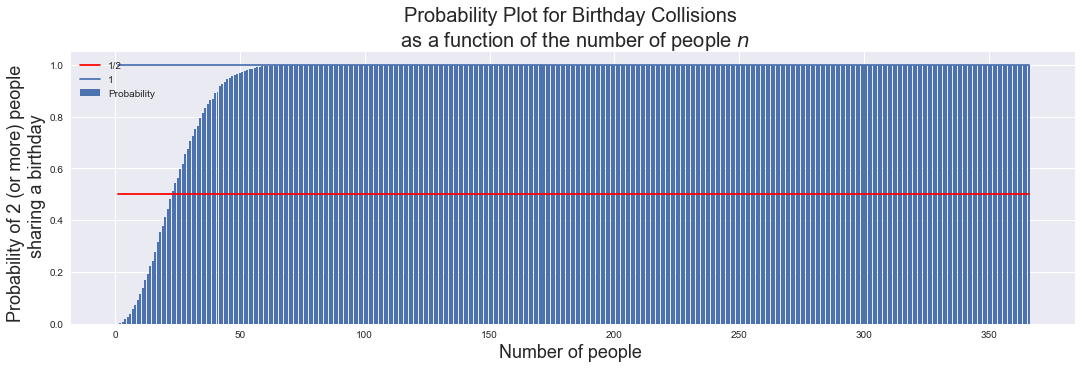

In [33]:
plt.figure(figsize=(18,5))
plt.bar(x,y, label="Probability")
plt.xlabel("Number of people ",fontsize=18)
plt.ylabel("Probability of 2 (or more) people  \n sharing a birthday",fontsize=18)
plt.title("Probability Plot for Birthday Collisions \n as a function of the number of people $n$ ",fontsize=20)
plt.plot(x,[.5 for i in x], label='1/2', c='r')
plt.plot(x,[1 for i in x], label='1')
plt.legend(loc=2)
plt.show()

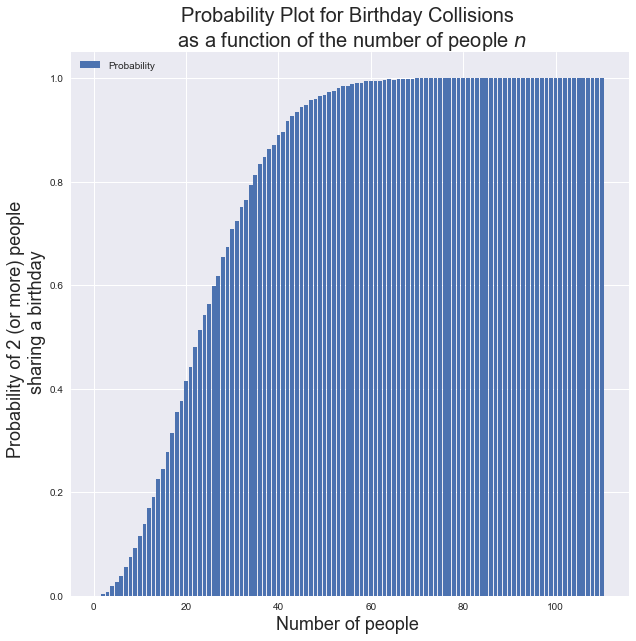

In [34]:
# Truncated version 
plt.figure(figsize=(10,10))
plt.bar(x[:110],y[:110], label="Probability")
plt.xlabel("Number of people ",fontsize=18)
plt.ylabel("Probability of 2 (or more) people  \n sharing a birthday",fontsize=18)
plt.title("Probability Plot for Birthday Collisions \n as a function of the number of people $n$ ",fontsize=20)
plt.legend(loc=2)
plt.show()

# Implications of Birthday Paradox [Not Required]
For those of you who are curious as to why we even care about if pairs of people share a birthday feel free to explore a particularly interesting application at https://en.wikipedia.org/wiki/Collision_attack, https://en.wikipedia.org/wiki/Birthday_attack  and https://en.wikipedia.org/wiki/Rainbow_table